In [19]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import gridspec

from scipy.interpolate import InterpolatedUnivariateSpline

from matplotlib import figure
from ipywidgets import interact, interactive
from ipywidgets import HBox, VBox
from ipywidgets import GridspecLayout
from ipywidgets import Button, Layout, jslink, IntText, IntSlider, Text

def create_expanded_button(description, button_style):
    return Button(description=description, button_style=button_style, layout=Layout(height='auto', width='auto'))


In [2]:
SNeff_path = f'/global/u1/c/cjacobus/CMB-S4/MDet_yrs_vs_SNeff.csv'
SNeff_file = open(SNeff_path, "r")

MDet_years1 = []
SNeffs1 = []

lines = SNeff_file.readlines()
for line in lines[6:36]:
    vals = line.split(',')
    MDet_years1.append(float(vals[2]))
    SNeffs1.append(float(vals[3]))
    

MDet_to_SNeff = InterpolatedUnivariateSpline(MDet_years1, SNeffs1)

In [3]:
Freeze_path = f'/global/u1/c/cjacobus/CMB-S4/Freeze_outs.csv'
Freeze_file = open(Freeze_path, "r")

SNeffs2 = []
spin0 = []
spin05 = []
spin1 = []

lines = Freeze_file.readlines()
for line in lines[10:]:
    vals = line.split(',')
    SNeffs2.append(float(vals[0]))
    
    spin0.append(float(vals[1]))
    spin05.append(float(vals[2]) if len(vals[2]) > 0 else np.nan)
    spin1.append(float(vals[3]) if len(vals[3]) > 0 else np.nan)

SNeff_to_spin0 = InterpolatedUnivariateSpline(SNeffs2, spin0)
SNeff_to_spin05 = InterpolatedUnivariateSpline(SNeffs2[20:], spin05[20:])
SNeff_to_spin1 = InterpolatedUnivariateSpline(SNeffs2[27:], spin1[27:])

interactive(children=(Checkbox(value=True, description='SO_Used'), IntSlider(value=2026, description='SO_Start…

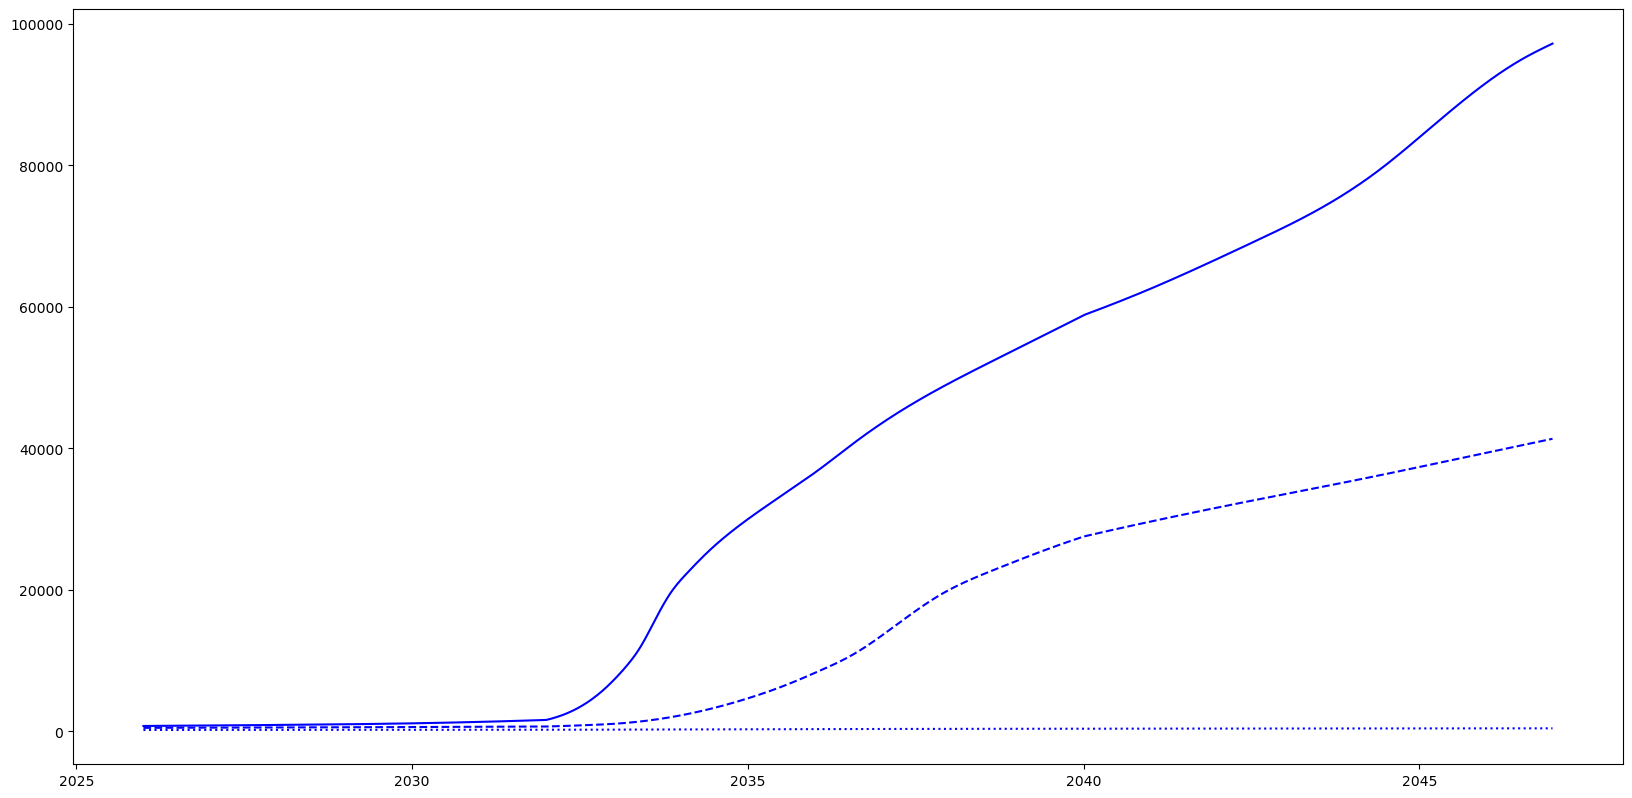

In [66]:
@interact
def my_widget(SO_Used     = True , SO_Start     = (2024, 2028), 
              AdvSO_Used  = True , AdvSO_Start  = (2029, 2035), AdvSO_Duration  = (7,10),
              CHLAT1_Used = True , CHLAT1_Start = (2030, 2035), CHLAT1_Duration = (10,20),
              CHALT2_Used = False, CHLAT2_Start = (2030, 2035), CHLAT2_Duration = (10,20),
              SEOND_CONFIG = True,
              SO_Used_2     = False , SO_Start_2    = (2024, 2028), 
              AdvSO_Used_2  = True , AdvSO_Start_2  = (2029, 2035), AdvSO_Duration_2  = (7,10),
              CHLAT1_Used_2 = True , CHLAT1_Start_2 = (2030, 2035), CHLAT1_Duration_2 = (10,20),
              CHALT2_Used_2 = False, CHLAT2_Start_2 = (2030, 2035), CHLAT2_Duration_2 = (10,20)   ):
    
    Detectors    = [0.031, 0.062  , 0.135    , 0.135    ] 
    Efficiencies = [0.9  , 0.9    , 1.0      , 1.0      ]
    Names        = ["SO" , "AdvSO", "CHLAT 1", "CHLAT 2"]
    
    StartYears   = [SO_Start, AdvSO_Start,  CHLAT1_Start,  CHLAT2_Start]
    Durations    = [AdvSO_Start-SO_Start,  AdvSO_Duration,  CHLAT1_Duration,  CHLAT2_Duration]
    Used         = [SO_Used,  AdvSO_Used,  CHLAT1_Used,  CHALT2_Used]
    
    used_map = map(int, Used)
    used_int = list(used_map)
    st_years = np.multiply(StartYears, used_int)
    st_years = st_years[st_years != 0]
    FirstYear = np.min(st_years)
    LastYear = np.max(np.multiply(np.add(StartYears,Durations), used_int))

    increment = 1/52

    years = np.arange(FirstYear, LastYear, increment)
    det_times = []
    total_det_time = 0

    for date in years:
        for i in range(len(Detectors)):
            if Used[i]:
                if date >= StartYears[i] and date <= StartYears[i] + Durations[i]:
                    total_det_time += Detectors[i]*Efficiencies[i]*increment

        det_times.append(total_det_time)

    These_SNeffs = MDet_to_SNeff(det_times)

    These_spin0s = SNeff_to_spin0(These_SNeffs)
    These_spin05s = SNeff_to_spin05(These_SNeffs)
    These_spin1s = SNeff_to_spin1(These_SNeffs)


    #===============================================================================================
    
    StartYears_2   = [SO_Start_2, AdvSO_Start_2,  CHLAT1_Start_2,  CHLAT2_Start_2]
    Durations_2    = [AdvSO_Start_2-SO_Start_2,  AdvSO_Duration_2,  CHLAT1_Duration_2,  CHLAT2_Duration_2]
    Used_2         = [SO_Used_2,  AdvSO_Used_2,  CHLAT1_Used_2,  CHALT2_Used_2]

    used_map_2 = map(int, Used_2)
    used_int_2 = list(used_map_2)
    st_years_2 = np.multiply(StartYears_2, used_int_2)
    st_years_2 = st_years_2[st_years_2 != 0]
    FirstYear_2 = np.min(st_years_2)
    LastYear_2 = np.max(np.multiply(np.add(StartYears_2,Durations_2), used_int_2))

    years_2 = np.arange(FirstYear_2, LastYear_2, increment)
    det_times_2 = []
    total_det_time_2 = 0

    for date_2 in years_2:
        for i in range(len(Detectors)):
            if Used_2[i]:
                if date_2 >= StartYears_2[i] and date_2 <= StartYears_2[i] + Durations_2[i]:
                    total_det_time_2 += Detectors[i]*Efficiencies[i]*increment

        det_times_2.append(total_det_time_2)

    These_SNeffs_2 = MDet_to_SNeff(det_times_2)

    These_spin0s_2 = SNeff_to_spin0(These_SNeffs_2)
    These_spin05s_2 = SNeff_to_spin05(These_SNeffs_2)
    These_spin1s_2 = SNeff_to_spin1(These_SNeffs_2)


    
    #===============================================================================================


    %matplotlib inline

    fig = plt.figure(figsize=(20, 10), dpi=100, constrained_layout=False)
    #fig.suptitle('Time-series Comparason', fontsize=24)
    gs1 = fig.add_gridspec(nrows = 1, ncols = 1, wspace=0.001) 

    ax0 = plt.subplot(gs1[0, 0])

    ax0.plot(years[:], These_spin0s[:], label='Spin 0', color='blue', linestyle='dotted')
    ax0.plot(years[:], These_spin05s[:], label='Spin 1/2', color='blue', linestyle='dashed')
    ax0.plot(years[:], These_spin1s[:], label='Spin 1', color='blue')
    
    if(SECOND_CONFIG):
        ax0.plot(years_2[:], These_spin0s_2[:], label='Spin 0', color='red', linestyle='dotted')
        ax0.plot(years_2[:], These_spin05s_2[:], label='Spin 1/2', color='red', linestyle='dashed')
        ax0.plot(years_2[:], These_spin1s_2[:], label='Spin 1', color='red')

    for i in range(len(StartYears)):
        if(Used[i]):
            ax0.plot((StartYears[i], StartYears[i]), (100, 10000), scaley = False, c = "#878787")
            ax0.text(StartYears[i] - 0.25, 12000, Names[i], rotation = 90, fontsize = 23, c = "#878787")

    ax0.set_yscale('log')

    ax0.set_xlabel('Year', fontsize = 30)
    ax0.set_ylabel('Freeze Out Temp [MeV]', fontsize = 30)
    ax0.tick_params(axis='x', labelsize=23)
    ax0.tick_params(axis='y', labelsize=23)
    ax0.set_xlim(2022,2045)
    ax0.set_ylim(100,100000)

    ax0.legend()

    # fig.tight_layout()
    fig.savefig("Test-Timeline-Graph.png")
    plt.show()

In [28]:
widgets.HBox([b1, b2, b3])